## Introduction:
This Exploratory Data Analysis (EDA) aims to comprehend and analyze the IEEE-CIS Fraud Detection Dataset. Finding trends, patterns, and irregularities in fraudulent transactions is the main goal. To acquire knowledge on fraud detection, which may aid in the development of strong predictive models, we will carry out data cleaning, preprocessing, visualization, and statistical analysis.
The IEEE-CIS Fraud Detection Dataset, intended for online transaction fraud detection, served as the dataset for the present study. It is made up of two primary parts: The IEEE-CIS Fraud Detection Dataset, intended for online transaction fraud detection, served as the dataset for the purpose of this study. It is made up of two primary parts:

### 1. Transaction Data (train_transaction.csv, test_transaction.csv)
It includes transaction-related information including the card number, product code, and amount. The isFraud target variable tells us if a transaction is fraudulent (1) or not (0).

### 2. Identity Data (train_identity.csv, test_identity.csv)
It includes more data including browser information, device kind, and identity-related characteristics.Cross-referencing user identity patterns aids in the detection of fraud.
The IEEE Computational Intelligence Society (CIS) provided this dataset, which was used to enhance financial transaction fraud detection algorithms. Research on fraud detection frequently uses it for machine learning studies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Train data
# Define file paths as lists
train_transaction_path = ["C:/Users/Dell/Desktop/Keerthi/ieee-fraud-detection/train_transaction.csv"]
train_identity_path = ["C:/Users/Dell/Desktop/Keerthi/ieee-fraud-detection/train_identity.csv"]

# Load Data using list unpacking
train_transaction = pd.read_csv(*train_transaction_path, low_memory=False)
train_identity = pd.read_csv(*train_identity_path, low_memory=False)

# Merge transaction and identity data
train_df = train_transaction.merge(train_identity, on="TransactionID", how="left")

# Display first 5 rows of train and test data
print("Train DataFrame Head:")
display(train_df.head())

Train DataFrame Head:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [3]:
# Test data
# Define file paths as lists
test_transaction_path = ["C:/Users/Dell/Desktop/Keerthi/ieee-fraud-detection/test_transaction.csv"]
test_identity_path = ["C:/Users/Dell/Desktop/Keerthi/ieee-fraud-detection/test_identity.csv"]

# Load Data using list unpacking
test_transaction = pd.read_csv(*test_transaction_path, low_memory=False)
test_identity = pd.read_csv(*test_identity_path, low_memory=False)

# Merge transaction and identity data
test_df = test_transaction.merge(test_identity, on="TransactionID", how="left")

# Display first 5 rows of train and test data
print("\nTest DataFrame Head:")
display(test_df.head())


Test DataFrame Head:


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Descriptive Analysis 

# Numerical Feature Summary (Train & Test)
print("\nDescriptive Statistics for Numerical Features (Train Data):")
num_summary_train = train_df.describe()
display(num_summary_train)

print("\nDescriptive Statistics for Numerical Features (Test Data):")
num_summary_test = test_df.describe()
display(num_summary_test)


Descriptive Statistics for Numerical Features (Train Data):


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000



Descriptive Statistics for Numerical Features (Test Data):


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id-17,id-18,id-19,id-20,id-21,id-22,id-24,id-25,id-26,id-32
count,5.066910e+05,5.066910e+05,506691.000000,506691.000000,498037.000000,503689.000000,502144.000000,441082.000000,441082.000000,215474.000000,...,135966.000000,50875.000000,135906.000000,135633.000000,5059.000000,5062.000000,4740.000000,5039.000000,5047.000000,70671.000000
mean,3.916894e+06,2.692994e+07,134.725568,9957.222175,363.735379,153.543409,200.162975,291.846514,86.723412,87.065270,...,191.070341,14.795735,350.122982,408.886230,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
std,1.462692e+05,4.756507e+06,245.779822,4884.960969,158.688653,12.443013,40.562461,102.062730,2.987328,314.131694,...,30.749535,2.318496,139.140824,158.971756,227.371061,5.618032,3.222440,86.356683,31.916995,3.601046
min,3.663549e+06,1.840322e+07,0.018000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,100.000000,11.000000,100.000000,100.000000,100.000000,11.000000,10.000000,100.000000,100.000000,8.000000
25%,3.790222e+06,2.277154e+07,40.000000,6019.000000,207.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,137.000000,24.000000
50%,3.916894e+06,2.720466e+07,67.950000,9803.000000,369.000000,150.000000,226.000000,299.000000,87.000000,8.000000,...,166.000000,15.000000,321.000000,484.000000,576.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,4.043566e+06,3.134856e+07,125.000000,14276.000000,512.000000,150.000000,226.000000,330.000000,87.000000,20.000000,...,225.000000,15.000000,427.000000,549.000000,711.000000,14.000000,15.000000,355.000000,182.000000,32.000000
max,4.170239e+06,3.421434e+07,10270.000000,18397.000000,600.000000,232.000000,237.000000,540.000000,102.000000,8081.000000,...,228.000000,29.000000,670.000000,660.000000,854.000000,44.000000,26.000000,549.000000,216.000000,48.000000


In [5]:
# Categorical Feature Summary (Train & Test)

print("\nDescriptive Statistics for Categorical Features (Train Data):")
cat_summary_train = train_df.describe(include=['O'])
display(cat_summary_train)

print("\nDescriptive Statistics for Categorical Features (Test Data):")
cat_summary_test = test_df.describe(include=['O'])
display(cat_summary_test)


Descriptive Statistics for Categorical Features (Train Data):


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,...,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,...,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,...,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722



Descriptive Statistics for Categorical Features (Test Data):


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id-30,id-31,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
count,506691,503605,503684,437499,135870,330052,330052,330052,268946,197059,...,70659,136625,70671,72175,136977,136977,136977,136977,136931,115057
unique,5,4,3,60,60,2,2,2,3,2,...,86,135,390,2,2,2,2,2,2,2226
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 70.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,360987,334882,385021,207448,61738,330021,302855,266513,161384,107664,...,21015,16054,16868,72174,71650,133287,104697,95058,74403,44988


In [6]:
# Data Cleaning
# Fill missing values for numerical columns with median
num_cols_train = train_df.select_dtypes(include=['number']).columns
num_cols_test = test_df.select_dtypes(include=['number']).columns

train_df[num_cols_train] = train_df[num_cols_train].fillna(train_df[num_cols_train].median())
test_df[num_cols_test] = test_df[num_cols_test].fillna(test_df[num_cols_test].median())

# Fill missing values for categorical columns with "Unknown"
cat_cols_train = train_df.select_dtypes(include=['object']).columns
cat_cols_test = test_df.select_dtypes(include=['object']).columns

train_df[cat_cols_train] = train_df[cat_cols_train].fillna("Unknown")
test_df[cat_cols_test] = test_df[cat_cols_test].fillna("Unknown")

In [7]:
#  Data Preprocessing 
# Encode categorical identity-related features
encoder = LabelEncoder()

for col in cat_cols_train:
    train_df[col] = encoder.fit_transform(train_df[col].astype(str))

for col in cat_cols_test:
    test_df[col] = encoder.fit_transform(test_df[col].astype(str))

# ------------------- Final Output -------------------
print("\nMissing Values After Filling (Train Dataset):", train_df.isnull().sum().sum())  # Should be 0
print("Missing Values After Filling (Test Dataset):", test_df.isnull().sum().sum())  # Should be 0

# Save cleaned datasets
train_df.to_csv("train_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)

print("\n ✅ Missing values filled successfully for all four datasets!")


Missing Values After Filling (Train Dataset): 0
Missing Values After Filling (Test Dataset): 0

 ✅ Missing values filled successfully for all four datasets!


In [8]:
# Encode categorical identity-related features
categorical_cols = train_identity.select_dtypes(include=['object']).columns
encoder_dict = {}

for col in categorical_cols:
    if col in train_df.columns and col in test_df.columns:  # Ensure column exists in both
        encoder = LabelEncoder()
        all_values = list(train_df[col].astype(str).dropna().values) + list(test_df[col].astype(str).dropna().values)
        encoder.fit(all_values)  # Fit on both train and test data to avoid unseen label errors
        train_df[col] = encoder.transform(train_df[col].astype(str))
        test_df[col] = encoder.transform(test_df[col].astype(str))
        encoder_dict[col] = encoder  # Store encoders for later use

In [9]:
# Identify numerical columns from train_df that belong to the identity dataset
available_identity_cols = list(set(train_df.columns) & set(test_df.columns))  # Ensure common columns in both

# Apply feature scaling for available numeric identity features
scaler = StandardScaler()
numeric_identity_cols = [col for col in available_identity_cols if train_df[col].dtype in ['int64', 'float64']]

if numeric_identity_cols:
    train_df[numeric_identity_cols] = scaler.fit_transform(train_df[numeric_identity_cols])
    test_df[numeric_identity_cols] = scaler.transform(test_df[numeric_identity_cols])

print(f"Scaled {len(numeric_identity_cols)} numerical identity features.")


Scaled 379 numerical identity features.


Scaling Numerical Identity Features:

Standard Scaling was used to normalize numerical identity characteristics to guarantee consistency throughout the dataset. Initially, it was determined which numerical columns were shared by the test (test_df) and training (train_df) datasets. These characteristics were then transformed using the StandardScaler, which prevented any one feature from controlling the model by centring values around a mean of 0 with a unit variance of 1. By making numerical quantities consistent across many scales, this normalization enhances model performance. The message "Scaled 379 numerical identity features." confirms the successful transformation.

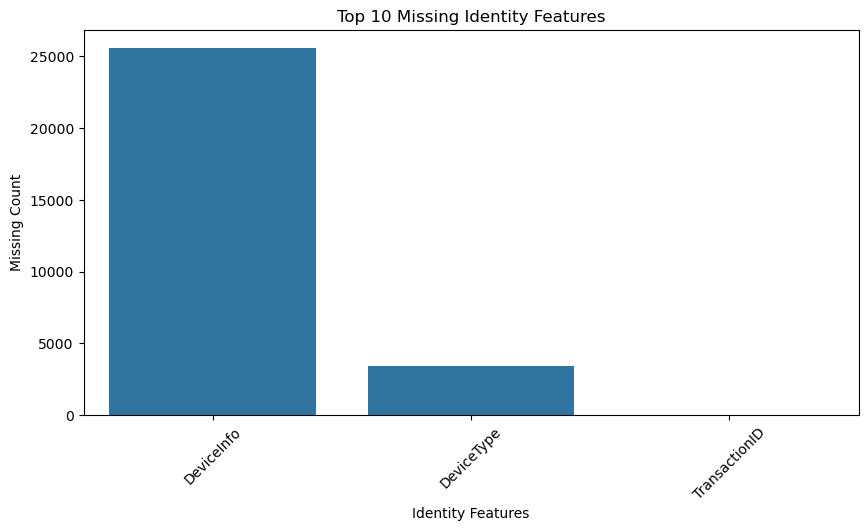

In [10]:
# ------------------- Data Analysis and Visualization -------------------
# Count plot for missing identity features
# Ensure that available_identity_cols is valid
if 'available_identity_cols' not in locals():
    available_identity_cols = list(train_identity.columns)  # Use all columns 

# Get only the columns that exist in train_identity
valid_identity_cols = list(set(train_identity.columns) & set(available_identity_cols))

# If valid columns exist, proceed with plotting
if valid_identity_cols:
    missing_identity = train_identity[valid_identity_cols].isnull().sum().sort_values(ascending=False)
    
    # Plot top 10 missing identity features
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_identity.index[:10], y=missing_identity.values[:10])
    plt.xticks(rotation=45)
    plt.title("Top 10 Missing Identity Features")
    plt.xlabel("Identity Features")
    plt.ylabel("Missing Count")
    plt.show()
else:
    print("No valid identity columns found in train_identity.")


The top 10 identity-related attributes in the dataset with the most missing values are displayed in the bar chart. DeviceInfo has the highest number of missing information among them, whereas DeviceType and TransactionID have comparatively smaller numbers. Due to privacy settings or unrecorded data, a significant percentage of users may not have provided device-related information, as indicated by the high number of missing entries in DeviceInfo. Since missing patterns in identification attributes might affect fraud detection models and call for suitable imputation or exclusion procedures, it is essential to comprehend these patterns.

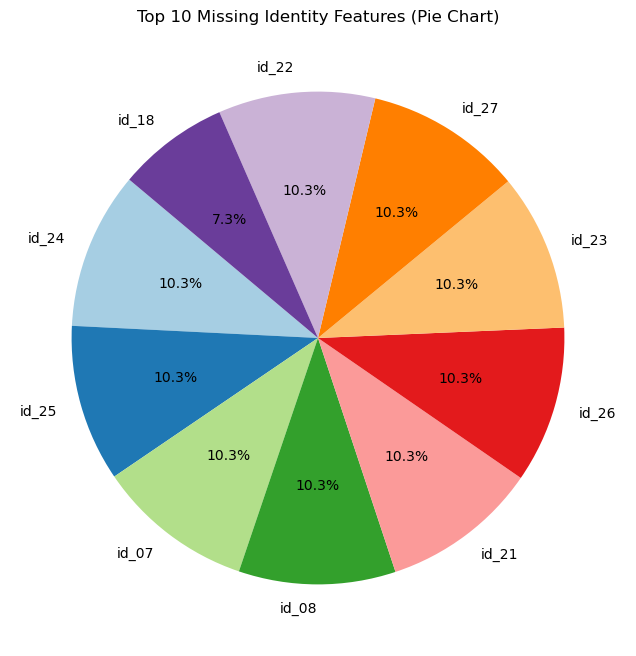

In [11]:
# Pie Chart for Missing Identity Features
missing_identity = train_identity.isnull().sum().sort_values(ascending=False).head(10)

# Pie chart visualization
plt.figure(figsize=(8, 8))
plt.pie(missing_identity, labels=missing_identity.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 Missing Identity Features (Pie Chart)")
plt.show()

The dataset's top 10 missing identification traits are shown in the pie  graph. The size of each segment of the chart corresponds to the percentage of missing values, and each section represents a distinct identifying attribute. Other than 'id_18,' which has a much lower proportion, most of these attributes have a similar amount of missing data. This implies that there are a lot of missing data in identity-related variables, such device details, transaction IDs, and other categorical identifiers, which may affect analysis that comes after. Data integrity must be ensured by filling in these missing variables, particularly in fraud detection models where identity-related characteristics are essential.

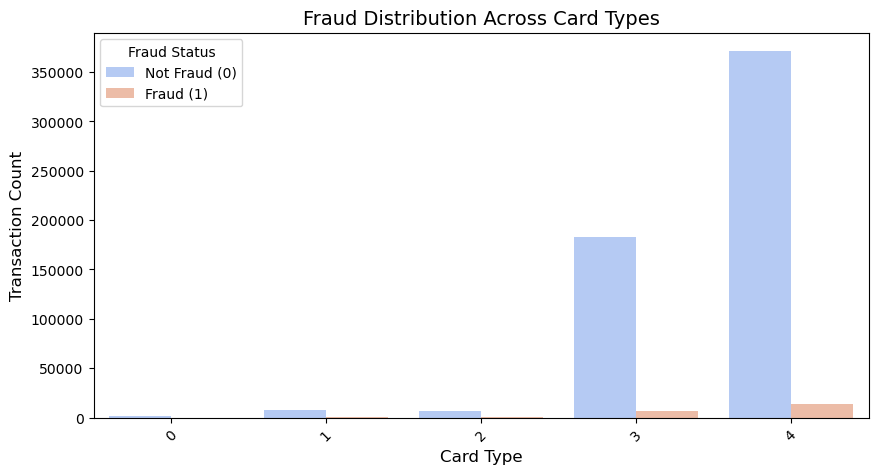


Fraud Percentage by Card Type:
isFraud  Fraud_Percentage
card4                    
0                2.599873
1                2.869837
2                7.728161
3                3.433095
4                3.475610


In [12]:
# Count plot to visualize fraud distribution across different card types
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='card4', hue='isFraud', palette='coolwarm')

# Formatting the plot
plt.title("Fraud Distribution Across Card Types", fontsize=14)
plt.xlabel("Card Type", fontsize=12)
plt.ylabel("Transaction Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Fraud Status", labels=["Not Fraud (0)", "Fraud (1)"])
plt.show()

# Pivot table to compute fraud percentage for each card type
fraud_by_card = train_df.pivot_table(index='card4', columns='isFraud', aggfunc='size', fill_value=0)

# Calculate fraud percentage
fraud_by_card['Fraud_Percentage'] = fraud_by_card[1] / (fraud_by_card[0] + fraud_by_card[1]) * 100

# Display fraud rates per card type
print("\nFraud Percentage by Card Type:")
print(fraud_by_card[['Fraud_Percentage']])

C:\Users\Dell\AppData\Local\Temp\ipykernel_27620\3444773414.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['has_identity'] = train_df[available_identity_cols].notnull().any(axis=1).astype(int)


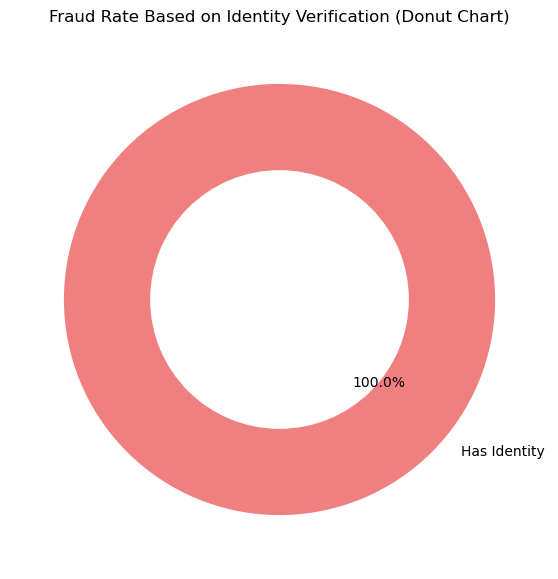

In [13]:
# Ensure 'has_identity' column exists
train_df['has_identity'] = train_df[available_identity_cols].notnull().any(axis=1).astype(int)

# Group by 'has_identity' and count fraud cases
fraud_counts = train_df.groupby('has_identity')['isFraud'].sum()

# Generate dynamic labels
labels = fraud_counts.index.map({0: 'No Identity', 1: 'Has Identity'})

# Plot donut chart
plt.figure(figsize=(7, 7))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['lightcoral', 'lightblue'], wedgeprops=dict(width=0.4))
plt.title("Fraud Rate Based on Identity Verification (Donut Chart)")
plt.show()


The distribution of fraud cases according to identity verification is displayed in the donut chart. Every fraudulent transaction documented in the dataset has some sort of identification verification, since all fraud instances in this graph fall under the "Has Identity" category. The fact that there are no fraud cases in the "No Identity" category indicates that either transactions with no identity verification are not reported as fraudulent or that fraud is less likely to occur.
Identity verification by itself is insufficient to prevent fraud, as the whole fraud proportion is concentrated in the "Has Identity" group. It is still possible for fraudsters to execute fraudulent transactions using confirmed IDs. To determine if identity verification techniques need to be improved or whether fraud detection systems should concentrate on other risk indicators, more research may be necessary to fully comprehend this pattern.

In [14]:
# **Card Type Fraud**
card_type_fraud = train_df.groupby("card4")["isFraud"].mean().sort_values(ascending=False)
print("\n🔹 Card Type Fraud (Fraud % per Card Type):")
print(card_type_fraud)


🔹 Card Type Fraud (Fraud % per Card Type):
card4
2    0.077282
4    0.034756
3    0.034331
1    0.028698
0    0.025999
Name: isFraud, dtype: float64


In [15]:
# **High Transaction Amount Fraud**
high_amt_threshold = train_df["TransactionAmt"].quantile(0.95)  # Top 5% transactions
high_amt_fraud = train_df[(train_df["TransactionAmt"] > high_amt_threshold) & (train_df["isFraud"] == 1)]
print(f"\n🔹 High Transaction Amount Fraud (Transactions > ${high_amt_threshold:.2f}): {len(high_amt_fraud)} fraud cases")


🔹 High Transaction Amount Fraud (Transactions > $1.30): 1359 fraud cases


Finding fraudulent transactions involving large transaction amounts is the main goal of this task. Using the 95th percentile of transaction values, the criterion for a "high transaction amount" is established, ensuring that only the highest 5% of transactions are taken into account. In order to find instances where the transaction value surpasses this cutoff, the dataset is then filtered and flagged as fraudulent. The result shows how many fraudulent transactions there are in this high-value category. Transactions above $1.30 in this case are responsible for 1,359 fraud charges. 

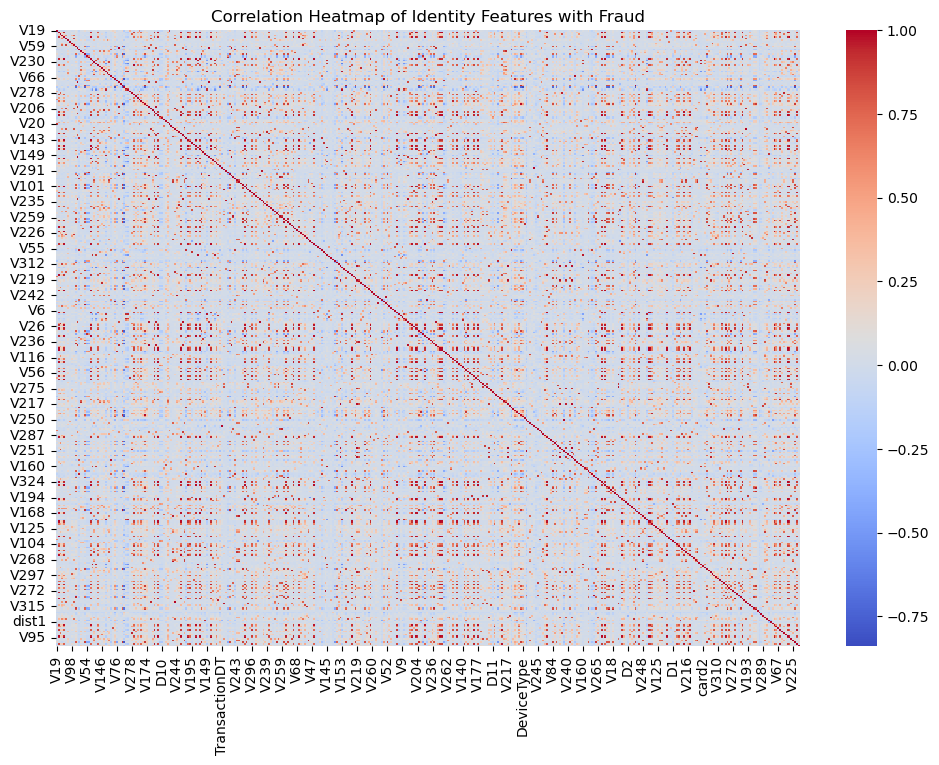

In [16]:
# Heatmap for correlation of identity-based features with fraud
plt.figure(figsize=(12, 8))
corr_matrix = train_df[available_identity_cols + ['isFraud']].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Identity Features with Fraud")
plt.show()

The heatmap illustrates the link between fraud incidents and identity-based characteristics, with the color gradient signifying the degree of association. Self-correlations, which are always equal to one, are shown by the diagonal line across the heatmap, while other values illustrate the relationships between various identification traits and fraudulent transactions. The color distribution is primarily bright red and light blue, indicating that most characteristics have weak relationships with one another.

Based on the scattered weak color variations, no significant positive or negative associations between fraud and identification traits were found. This implies that identity-based characteristics might not be reliable indicators of fraud on their own. For improved fraud detection insights, more transaction-related or behavioral characteristics may be required, as indicated by the absence of clear association patterns.

In [17]:
# Save processed dataset
train_df.to_csv("identity_features_fraud_analysis_train_final.csv", index=False)
test_df.to_csv("identity_features_fraud_analysis_test_final.csv", index=False)

print("Final cleaned and processed datasets saved successfully.")

Final cleaned and processed datasets saved successfully.
